**Table of contents**<a id='toc0_'></a>    
- [FIRST LET'S CREATE A MONTH AND YEAR COLUMN](#toc1_1_1_1_)    
        - [GROUPING BY STORE NUMBER AND MONTH YEAR](#toc1_1_1_1_1_)    
          - [LOOKING AT TOTAL SALES BY STORE NUMBER](#toc1_1_1_1_1_1_)    
      - [LOOKING FOR TOTAL SALES IN TRIAL STORES](#toc1_1_1_2_)    
        - [SORTING STORES BY TOTAL SALES LOOKING FOR A MATCH FOR STORE 77](#toc1_1_1_2_1_)    
      - [ISOLATING THE STORES](#toc1_1_1_3_)    
        - [PUTTING THE STORES IN A PIVOT CHART FORMAT](#toc1_1_1_3_1_)    
          - [LOOKING AT CORRELATION](#toc1_1_1_3_1_1_)    
          - [STORE 41 AND 77 HAS HAS THE STRONGEST CORRELATION AT 0.762. LETS GRAPH IT.](#toc1_1_1_3_1_2_)    
          - [THESE ARE THE TOP 10 CORRELATIONS TO STORE 77. STORE 41 WOULD BE RANKED IN 3RD PLACE. LETS LOOK AT THE OTHER STORES BY TOTAL SALES BEFORE I MAKE A DECISION.](#toc1_1_1_3_1_3_)    
        - [ PUTTING THE STORES IN A PIVOT CHART FORMAT](#toc1_1_1_3_2_)    
          - [THAT'S AN UGLY LOOKING LINE CHART. LETS TAKE A CLOSER LOOK AT THE CORRELATIONS BETWEEN THEM AND RECHART JUST THE TWO.](#toc1_1_1_3_2_1_)    
          - [STORE 109 AND 86 HAS HAS THE STRONGEST CORRELATION AT 0.643. LETS GRAPH IT.](#toc1_1_1_3_2_2_)    
        - [THESE ARE THE TOP 10 CORRELATIONS TO STORE 86. STORE 109 WOULD BE RANKED IN 5TH PLACE. LETS LOOK AT THE OTHER STORES BY TOTAL SALES BEFORE I MAKE A DECISION](#toc1_1_1_3_3_)    
          - [STORE 231 EVEN THOUGH IT HAS A GOOD CORRELATION STORE 109 IS A MUCH BETTER FIT. STORE 31 EVEN THOUGH is A BEST MATCH CORRELATION WISE IT DOES NOT MAKE SENSE WITH SALES VOLUME. SO I WILL GO WITH STORE 41.](#toc1_1_1_3_3_1_)    
          - [THESE ARE THE TOP 10 CORRELATIONS TO STORE 88. LETS LOOK AT THE OTHER STORES BY TOTAL SALES BEFORE I MAKE A DECISION.](#toc1_1_1_3_3_2_)    
          - [STORE 229 EVEN THOUGH IT HAS A GOOD CORRELATION STORE 201 IS A MUCH BETTER FIT. STORE 206 EVEN THOUGH is A BEST MATCH CORRELATION WISE IT DOES NOT MAKE SENSE WITH SALES VOLUME. SO I WILL GO WITH STORE 201.](#toc1_1_1_3_3_3_)    
        - [LETS START WITH STORE 77 & 41](#toc1_1_1_3_4_)    
        - [LETS START WITH STORE 86 & 109](#toc1_1_1_3_5_)    
          - [FOR THE SECOND PAIR WE CAN SEE A CLEAR DIFFERENCE BETWEEN THE TRIAL STORE AND THE CONTROL STORE. LETS LOOK AT THE NEXT PAIR OF STORES.](#toc1_1_1_3_5_1_)    
        - [LETS START WITH STORE 88 & 201](#toc1_1_1_3_6_)    
          - [FOR THE THIRD PAIR WE CAN SEE A CLEAR DIFFERENCE BETWEEN THE TRIAL STORE AND THE CONTROL STORE. LETS LOOK AT THE NEXT PAIR OF STORES](#toc1_1_1_3_6_1_)    
        - [AS WE CAN SEE BY THE GRAPHS ABOVE THE TRIAL STORES OUTPERFORMED THE CONTROL STORES BY QUANTITY SOLD.](#toc1_1_1_3_7_)    
        - [LETS SEE HOW THEY STACK UP WITH AVERAGE TRANSACTIONS PER CUSTOMER](#toc1_1_1_3_8_)    
          - [AS WE CAN SEE THE AVERAGE TRANSACTIONS WERE SLIGHTLY HIGHER FOR 1 OF THE 3 TRIAL STORES.](#toc1_1_1_3_8_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

##### importing requriments

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats



import warnings 
warnings.filterwarnings('ignore')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactive = 'all'

In [3]:
dataset = pd.read_csv(r'C:\Users\SRIKANTH ADIPIREDDY\TASK-2\QVI_data.csv')

In [4]:
dataset.head()

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


In [ ]:
dataset.dtypes

LYLTY_CARD_NBR        int64
DATE                 object
STORE_NBR             int64
TXN_ID                int64
PROD_NBR              int64
PROD_NAME            object
PROD_QTY              int64
TOT_SALES           float64
PACK_SIZE             int64
BRAND                object
LIFESTAGE            object
PREMIUM_CUSTOMER     object
dtype: object

#### <a id='toc1_1_1_1_'></a>[FIRST LET'S CREATE A MONTH AND YEAR COLUMN](#toc0_)



In [6]:
dataset["DATE"]=pd.to_datetime(dataset["DATE"])
dataset["MONTH_YEAR"] = dataset["DATE"].dt.strftime("%m/%Y")
dataset["MONTH_YEAR"]

0         10/2018
1         09/2018
2         03/2019
3         03/2019
4         11/2018
           ...   
264829    12/2018
264830    10/2018
264831    10/2018
264832    10/2018
264833    12/2018
Name: MONTH_YEAR, Length: 264834, dtype: object

In [ ]:
dataset.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER', 'MONTH_YEAR'],
      dtype='object')

##### <a id='toc1_1_1_1_1_'></a>[GROUPING BY STORE NUMBER AND MONTH YEAR](#toc0_)



In [ ]:
chips_grp_before= dataset.groupby(["STORE_NBR","MONTH_YEAR"])
total_grp = chips_grp_before["TOT_SALES"].sum()
total_grp

STORE_NBR  MONTH_YEAR
1          01/2019       154.80
           02/2019       225.40
           03/2019       192.90
           04/2019       192.90
           05/2019       221.40
                          ...  
272        08/2018       372.85
           09/2018       304.70
           10/2018       430.60
           11/2018       376.20
           12/2018       403.90
Name: TOT_SALES, Length: 3169, dtype: float64

###### <a id='toc1_1_1_1_1_1_'></a>[LOOKING AT TOTAL SALES BY STORE NUMBER](#toc0_)



In [ ]:
chips_grp = dataset.groupby(["STORE_NBR"])
total_sales = chips_grp["TOT_SALES"].sum()
total_sales

STORE_NBR
1       2393.60
2       2005.80
3      12802.45
4      14647.65
5       9500.80
         ...   
268     2601.05
269    11221.80
270    11293.95
271     9721.80
272     4653.95
Name: TOT_SALES, Length: 272, dtype: float64

#### <a id='toc1_1_1_2_'></a>[LOOKING FOR TOTAL SALES IN TRIAL STORES](#toc0_)



In [10]:
trial_store = total_sales[76:88]
trial_store

STORE_NBR
77     3040.00
78     9381.25
79    11831.20
80    11756.90
81    14361.95
82     4103.50
83     9924.90
84     5396.30
85       13.90
86    10635.35
87     3991.60
88    16333.25
Name: TOT_SALES, dtype: float64

##### 
TOTAL SALES IN TRIAL STORES - STORE 77 : 
10635.35 - STORE 88 : $16333.25

NOW SINCE WE HAVE THE TOTAL SALES FOR THE TRIAL STORES. LETS LOOK FOR MATCHING CONTROL STORES FOR EACH. THERE ARE 272 STORES. I WILL USE 2 METHODS TO DETERMINE A CONTROL STORE. I WILL FIRST GO BY TOTAL SALES TO FIND STORES WITH SIMILAR TOTAL SALES. THEN I WILL USE THE PEARSON CORRELATIONS TEST TO DETERMINE HOW CORRELATED THE STORES ARE.

##### <a id='toc1_1_1_2_1_'></a>[SORTING STORES BY TOTAL SALES LOOKING FOR A MATCH FOR STORE 77](#toc0_)



In [ ]:
total_sales = total_sales.sort_values(ascending=False)
total_sales.iloc[57:75]

STORE_NBR
178    11302.50
270    11293.95
69     11288.85
223    11248.15
157    11231.00
257    11223.50
269    11221.80
33     11164.00
114    11139.50
91     11021.90
137    10998.45
184    10937.55
160    10918.85
180    10872.50
138    10824.80
55     10760.15
106    10742.60
164    10718.90
Name: TOT_SALES, dtype: float64

#### <a id='toc1_1_1_3_'></a>[ISOLATING THE STORES](#toc0_)



In [ ]:
stores_control_one = [41, 268, 195, 163, 6, 53, 214, 176, 233, 255, 185, 187, 205, 220, 50, 46, 141, 77]
control_one = pd.DataFrame({"Value" : total_grp[stores_control_one]})
print(control_one)

                      Value
STORE_NBR MONTH_YEAR       
41        01/2019     169.0
          02/2019     234.6
          03/2019     226.2
          04/2019     231.3
          05/2019     258.8
...                     ...
77        08/2018     255.5
          09/2018     225.2
          10/2018     204.5
          11/2018     245.3
          12/2018     267.3

[216 rows x 1 columns]


##### <a id='toc1_1_1_3_1_'></a>[PUTTING THE STORES IN A PIVOT CHART FORMAT](#toc0_)



In [ ]:
pivot_chips = control_one.pivot_table(index="MONTH_YEAR", columns="STORE_NBR", values="Value")
pivot_chips

STORE_NBR,6,41,46,50,53,77,141,163,176,185,187,195,205,214,220,233,255,268
MONTH_YEAR,,,,,,,,,,,,,,,,,,
01/2019,191.1,169.0,176.20,223.9,172.90,204.4,340.3,208.9,187.2,261.1,184.2,153.30,256.1,232.5,238.7,177.5,231.7,157.70
02/2019,224.0,234.6,222.40,154.5,179.10,235.0,246.7,182.0,248.7,217.8,246.5,185.50,171.8,209.5,202.9,244.0,215.7,165.00
03/2019,179.5,226.2,259.20,227.0,225.80,278.5,241.7,268.8,246.4,245.3,247.2,186.70,331.1,286.5,269.3,199.1,206.6,225.00
04/2019,197.9,231.3,260.00,242.4,227.80,263.5,186.2,198.3,227.4,283.6,240.2,181.70,195.1,255.2,220.1,158.6,239.4,191.50
05/2019,257.3,258.8,243.55,219.5,272.35,299.3,194.9,233.8,289.5,314.6,218.3,261.30,246.7,203.0,259.6,344.4,220.7,245.80
06/2019,207.4,237.7,280.30,270.8,198.90,264.7,238.4,240.3,269.3,222.8,255.3,184.60,227.9,252.1,267.7,221.0,316.3,224.70
07/2018,260.0,216.4,253.00,314.4,229.80,296.8,272.8,188.6,287.2,225.6,253.9,227.50,320.6,182.4,244.1,290.7,254.1,224.00
08/2018,203.2,209.8,240.70,292.4,255.10,255.5,225.3,183.1,147.1,276.3,214.3,332.25,283.6,249.4,275.0,285.9,171.9,322.65
09/2018,207.7,216.1,233.00,258.8,188.00,225.2,232.8,269.5,195.4,196.9,276.1,152.90,215.5,218.6,219.3,228.6,227.7,174.40


###### <a id='toc1_1_1_3_1_1_'></a>[LOOKING AT CORRELATION](#toc0_)


In [ ]:
pivot_chips.corr(method='pearson')

STORE_NBR,6,41,46,50,53,77,141,163,176,185,187,195,205,214,220,233,255,268
STORE_NBR,,,,,,,,,,,,,,,,,,
6,1.000000,-0.247151,0.256520,0.006834,0.242594,-0.021268,-0.027162,-0.295525,0.345540,-0.155127,-0.041647,0.398130,0.088312,-0.878726,0.416445,0.270639,0.132702,0.219004
41,-0.247151,1.000000,0.164603,-0.119241,0.167031,0.762292,-0.644727,0.275608,0.450519,0.339814,0.349995,-0.047535,-0.237444,0.292472,-0.341097,0.500753,0.069930,0.064578
46,0.256520,0.164603,1.000000,0.503370,0.650741,0.386913,-0.113383,0.165461,0.269525,-0.330201,0.420943,0.374234,0.005459,0.133498,0.322455,0.116010,0.457896,0.348140
50,0.006834,-0.119241,0.503370,1.000000,0.560896,0.304387,0.277132,-0.068682,-0.021411,-0.155053,0.052646,0.423526,0.374344,0.186751,0.141485,0.284899,0.264615,0.404818
53,0.242594,0.167031,0.650741,0.560896,1.000000,0.526309,-0.042187,-0.074408,0.140227,0.238337,0.004825,0.763772,0.209564,0.141150,0.265352,0.546609,-0.080768,0.583553
77,-0.021268,0.762292,0.386913,0.304387,0.526309,1.000000,-0.413535,0.167020,0.531159,0.373824,0.285749,0.271905,0.291275,0.208531,0.013562,0.613063,0.099836,0.372558
141,-0.027162,-0.644727,-0.113383,0.277132,-0.042187,-0.413535,1.000000,-0.152094,-0.125022,-0.434634,-0.198275,-0.090739,0.163641,-0.004689,-0.060033,-0.127935,0.205388,-0.324463
163,-0.295525,0.275608,0.165461,-0.068682,-0.074408,0.167020,-0.152094,1.000000,-0.063802,-0.216258,0.600451,-0.399545,0.010123,0.260964,0.137705,-0.061831,0.217826,-0.155875
176,0.345540,0.450519,0.269525,-0.021411,0.140227,0.531159,-0.125022,-0.063802,1.000000,0.089027,-0.097138,-0.118839,0.118971,-0.152799,-0.108080,0.292296,0.425772,-0.149257


###### <a id='toc1_1_1_3_1_2_'></a>[STORE 41 AND 77 HAS HAS THE STRONGEST CORRELATION AT 0.762. LETS GRAPH IT.](#toc0_)



<Axes: xlabel='MONTH_YEAR'>

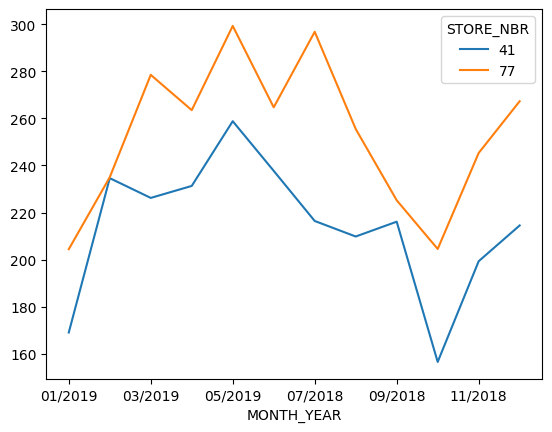

In [15]:
chips = pivot_chips[[41,77]]
chips .plot()

In [ ]:
total_grp_df = pd.DataFrame(total_grp)
total_grp_pivote = total_grp_df.pivot_table(index="MONTH_YEAR", columns="STORE_NBR", values="TOT_SALES")
total_grp_pivote_table = total_grp_pivote.corr(method='pearson')
total_grp_pivote_table[77].sort_values(ascending=False).head(10)

STORE_NBR
31     1.000000
77     1.000000
11     1.000000
41     0.762292
35     0.699708
167    0.696075
184    0.645118
63     0.633858
234    0.632204
20     0.620701
Name: 77, dtype: float64

###### <a id='toc1_1_1_3_1_3_'></a>[THESE ARE THE TOP 10 CORRELATIONS TO STORE 77. STORE 41 WOULD BE RANKED IN 3RD PLACE. LETS LOOK AT THE OTHER STORES BY TOTAL SALES BEFORE I MAKE A DECISION.](#toc0_)

In [17]:
dataset.columns

Index(['LYLTY_CARD_NBR', 'DATE', 'STORE_NBR', 'TXN_ID', 'PROD_NBR',
       'PROD_NAME', 'PROD_QTY', 'TOT_SALES', 'PACK_SIZE', 'BRAND', 'LIFESTAGE',
       'PREMIUM_CUSTOMER', 'MONTH_YEAR'],
      dtype='object')

In [18]:
dataset.TOT_SALES.loc[[31,11,41,35]]

31    6.0
11    6.2
41    2.3
35    2.7
Name: TOT_SALES, dtype: float64

In [ ]:
stores_control_two = [109, 191, 196, 229, 97, 102, 105, 232, 57, 172, 113, 225, 62, 236, 227, 155, 86, 247, 13, 164, 106, 55, 138]
control_two = pd.DataFrame({"Value" : total_grp[stores_control_two]})
print(control_two)

                       Value
STORE_NBR MONTH_YEAR        
109       01/2019      858.6
          02/2019      858.4
          03/2019     1039.2
          04/2019      728.6
          05/2019      720.6
...                      ...
138       08/2018      707.4
          09/2018      913.6
          10/2018     1015.4
          11/2018      991.4
          12/2018      918.0

[276 rows x 1 columns]


##### <a id='toc1_1_1_3_2_'></a>[ PUTTING THE STORES IN A PIVOT CHART FORMAT](#toc0_)



In [20]:
pivot_chips2 =control_one.pivot_table(index="MONTH_YEAR", columns="STORE_NBR", values="Value")
pivot_chips2

STORE_NBR,6,41,46,50,53,77,141,163,176,185,187,195,205,214,220,233,255,268
MONTH_YEAR,,,,,,,,,,,,,,,,,,
01/2019,191.1,169.0,176.20,223.9,172.90,204.4,340.3,208.9,187.2,261.1,184.2,153.30,256.1,232.5,238.7,177.5,231.7,157.70
02/2019,224.0,234.6,222.40,154.5,179.10,235.0,246.7,182.0,248.7,217.8,246.5,185.50,171.8,209.5,202.9,244.0,215.7,165.00
03/2019,179.5,226.2,259.20,227.0,225.80,278.5,241.7,268.8,246.4,245.3,247.2,186.70,331.1,286.5,269.3,199.1,206.6,225.00
04/2019,197.9,231.3,260.00,242.4,227.80,263.5,186.2,198.3,227.4,283.6,240.2,181.70,195.1,255.2,220.1,158.6,239.4,191.50
05/2019,257.3,258.8,243.55,219.5,272.35,299.3,194.9,233.8,289.5,314.6,218.3,261.30,246.7,203.0,259.6,344.4,220.7,245.80
06/2019,207.4,237.7,280.30,270.8,198.90,264.7,238.4,240.3,269.3,222.8,255.3,184.60,227.9,252.1,267.7,221.0,316.3,224.70
07/2018,260.0,216.4,253.00,314.4,229.80,296.8,272.8,188.6,287.2,225.6,253.9,227.50,320.6,182.4,244.1,290.7,254.1,224.00
08/2018,203.2,209.8,240.70,292.4,255.10,255.5,225.3,183.1,147.1,276.3,214.3,332.25,283.6,249.4,275.0,285.9,171.9,322.65
09/2018,207.7,216.1,233.00,258.8,188.00,225.2,232.8,269.5,195.4,196.9,276.1,152.90,215.5,218.6,219.3,228.6,227.7,174.40


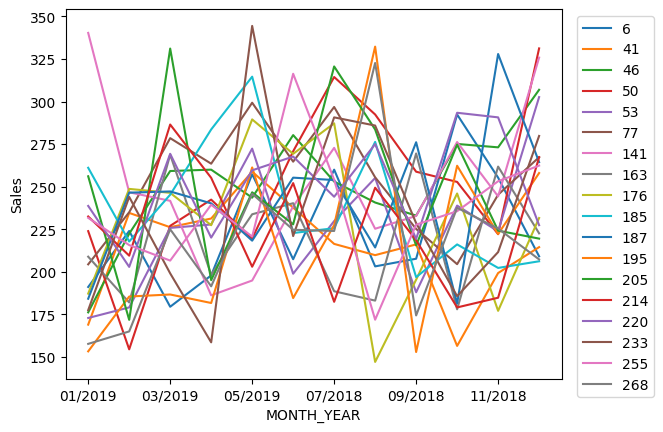

In [ ]:
pivot_chips2.plot()
plt.legend(loc = "upper right", bbox_to_anchor = (1.20, 1))
plt.ylabel("Sales")
plt.show()

###### <a id='toc1_1_1_3_2_1_'></a>[THAT'S AN UGLY LOOKING LINE CHART. LETS TAKE A CLOSER LOOK AT THE CORRELATIONS BETWEEN THEM AND RECHART JUST THE TWO.](#toc0_)

In [ ]:
pivot_chips2.corr(method='pearson') 

STORE_NBR,6,41,46,50,53,77,141,163,176,185,187,195,205,214,220,233,255,268
STORE_NBR,,,,,,,,,,,,,,,,,,
6,1.000000,-0.247151,0.256520,0.006834,0.242594,-0.021268,-0.027162,-0.295525,0.345540,-0.155127,-0.041647,0.398130,0.088312,-0.878726,0.416445,0.270639,0.132702,0.219004
41,-0.247151,1.000000,0.164603,-0.119241,0.167031,0.762292,-0.644727,0.275608,0.450519,0.339814,0.349995,-0.047535,-0.237444,0.292472,-0.341097,0.500753,0.069930,0.064578
46,0.256520,0.164603,1.000000,0.503370,0.650741,0.386913,-0.113383,0.165461,0.269525,-0.330201,0.420943,0.374234,0.005459,0.133498,0.322455,0.116010,0.457896,0.348140
50,0.006834,-0.119241,0.503370,1.000000,0.560896,0.304387,0.277132,-0.068682,-0.021411,-0.155053,0.052646,0.423526,0.374344,0.186751,0.141485,0.284899,0.264615,0.404818
53,0.242594,0.167031,0.650741,0.560896,1.000000,0.526309,-0.042187,-0.074408,0.140227,0.238337,0.004825,0.763772,0.209564,0.141150,0.265352,0.546609,-0.080768,0.583553
77,-0.021268,0.762292,0.386913,0.304387,0.526309,1.000000,-0.413535,0.167020,0.531159,0.373824,0.285749,0.271905,0.291275,0.208531,0.013562,0.613063,0.099836,0.372558
141,-0.027162,-0.644727,-0.113383,0.277132,-0.042187,-0.413535,1.000000,-0.152094,-0.125022,-0.434634,-0.198275,-0.090739,0.163641,-0.004689,-0.060033,-0.127935,0.205388,-0.324463
163,-0.295525,0.275608,0.165461,-0.068682,-0.074408,0.167020,-0.152094,1.000000,-0.063802,-0.216258,0.600451,-0.399545,0.010123,0.260964,0.137705,-0.061831,0.217826,-0.155875
176,0.345540,0.450519,0.269525,-0.021411,0.140227,0.531159,-0.125022,-0.063802,1.000000,0.089027,-0.097138,-0.118839,0.118971,-0.152799,-0.108080,0.292296,0.425772,-0.149257


###### <a id='toc1_1_1_3_2_2_'></a>[STORE 109 AND 86 HAS HAS THE STRONGEST CORRELATION AT 0.643. LETS GRAPH IT.](#toc0_)



In [ ]:
chips2_graph = pivot_chips2[[86, 109]]
chips2_graph.plot()
plt.show()

In [ ]:
total_grp_pivote_table[86].sort_values(ascending=False).head(10)

STORE_NBR
31     1.000000
86     1.000000
193    0.933364
159    0.675773
231    0.674071
109    0.643075
132    0.629011
260    0.623775
61     0.617243
229    0.596886
Name: 86, dtype: float64

##### <a id='toc1_1_1_3_3_'></a>[THESE ARE THE TOP 10 CORRELATIONS TO STORE 86. STORE 109 WOULD BE RANKED IN 5TH PLACE. LETS LOOK AT THE OTHER STORES BY TOTAL SALES BEFORE I MAKE A DECISION](#toc0_)

In [26]:
total_sales.loc[[31, 193, 159, 231, 109]]

STORE_NBR
31        14.8
193       13.1
159      338.9
231    12996.0
109    10399.1
Name: TOT_SALES, dtype: float64

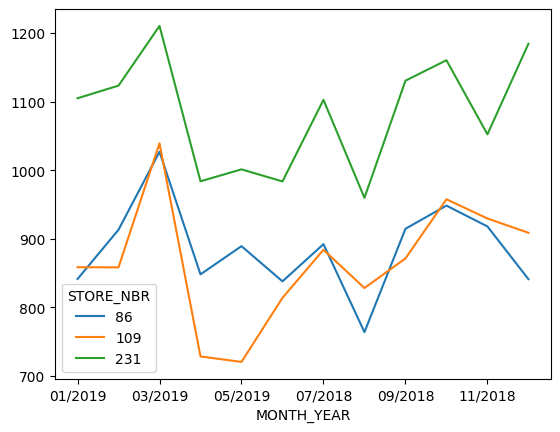

In [ ]:
# GRABBING STORE 231, 109, 86 FROM TOTAL GROUP DATAFRAME
three_amigos_86 = total_grp[[231, 109, 86]]

# MAKING DATAFRAME
amigos_86_df = pd.DataFrame(three_amigos_86)

# PIVOTING THE DATAFRAME
amigos_86_pivot = amigos_86_df.pivot_table(index="MONTH_YEAR", columns="STORE_NBR", values="TOT_SALES")
amigos_86_pivot.plot()
plt.show()

###### <a id='toc1_1_1_3_3_1_'></a>[STORE 231 EVEN THOUGH IT HAS A GOOD CORRELATION STORE 109 IS A MUCH BETTER FIT. STORE 31 EVEN THOUGH is A BEST MATCH CORRELATION WISE IT DOES NOT MAKE SENSE WITH SALES VOLUME. SO I WILL GO WITH STORE 41.](#toc0_)

FOR TRIAL STORE 86, I WILL USE STORE NUMBER 109 AS A CONTROL STORE. IT'S A 0.643 CORRELATION.

In [ ]:
total_grp_pivote_table[88].sort_values(ascending=False).head(10)

STORE_NBR
206    1.000000
88     1.000000
159    0.862608
193    0.836296
201    0.737583
188    0.733516
229    0.707309
228    0.697039
61     0.686658
140    0.613791
Name: 88, dtype: float64

###### <a id='toc1_1_1_3_3_2_'></a>[THESE ARE THE TOP 10 CORRELATIONS TO STORE 88. LETS LOOK AT THE OTHER STORES BY TOTAL SALES BEFORE I MAKE A DECISION.](#toc0_)

In [31]:
total_sales.loc[[206, 88, 159, 193, 201, 188, 229, 228, 61, 140]]


STORE_NBR
206        7.60
88     16333.25
159      338.90
193       13.10
201    14298.70
188     3086.00
229    10417.90
228     4236.30
61       562.90
140      244.90
Name: TOT_SALES, dtype: float64

In [ ]:
sorted_88 = total_grp_pivote_table[88].sort_values(ascending=False)
sorted_88[201]

np.float64(0.7375831241350634)

###### <a id='toc1_1_1_3_3_3_'></a>[STORE 229 EVEN THOUGH IT HAS A GOOD CORRELATION STORE 201 IS A MUCH BETTER FIT. STORE 206 EVEN THOUGH is A BEST MATCH CORRELATION WISE IT DOES NOT MAKE SENSE WITH SALES VOLUME. SO I WILL GO WITH STORE 201.](#toc0_)

In [ ]:
# CREATING NEW DATAFRAME FOR TRIAL & CONTROL STORE
# Selecting trial and control stores from chips_trial
trial_store_77 = dataset.loc[dataset["STORE_NBR"] == 77]
control_store_41 = dataset.loc[dataset["STORE_NBR"] == 41]

trial_store_86 = dataset.loc[dataset["STORE_NBR"] == 86]
control_store_109 = dataset.loc[dataset["STORE_NBR"] == 109]

trial_store_88 = dataset.loc[dataset["STORE_NBR"] == 88]
control_store_201 = dataset.loc[dataset["STORE_NBR"] == 201]

trial_store_77

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,MONTH_YEAR
73365,77000,2019-03-28,77,74911,18,Cheetos Chs & Bacon Balls 190g,1,3.3,190,CHEETOS,MIDAGE SINGLES/COUPLES,Budget,03/2019
73366,77000,2019-04-13,77,74912,69,Smiths Chip Thinly S/Cream&Onion 175g,1,3.0,175,SMITHS,MIDAGE SINGLES/COUPLES,Budget,04/2019
73367,77000,2018-09-26,77,74910,36,Kettle Chilli 175g,2,10.8,175,KETTLE,MIDAGE SINGLES/COUPLES,Budget,09/2018
73368,77001,2019-02-27,77,74913,7,Smiths Crinkle Original 330g,2,11.4,330,SMITHS,YOUNG FAMILIES,Mainstream,02/2019
73369,77001,2019-01-21,77,74914,9,Kettle Tortilla ChpsBtroot&Ricotta 150g,2,9.2,150,KETTLE,YOUNG FAMILIES,Mainstream,01/2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
264818,2330321,2018-07-30,77,236756,71,Twisties Cheese Burger 250g,2,8.6,250,TWISTIES,YOUNG SINGLES/COUPLES,Mainstream,07/2018
264819,2330331,2018-11-18,77,236760,95,Sunbites Whlegrn Crisps Frch/Onin 90g,2,3.4,90,SUNBITES,RETIREES,Budget,11/2018
264820,2330431,2018-07-31,77,236770,50,Tostitos Lightly Salted 175g,1,4.4,175,TOSTITOS,OLDER SINGLES/COUPLES,Mainstream,07/2018
264821,2330461,2018-07-21,77,236777,87,Infuzions BBQ Rib Prawn Crackers 110g,1,3.8,110,INFUZIONS,OLDER FAMILIES,Budget,07/2018


##### <a id='toc1_1_1_3_4_'></a>[LETS START WITH STORE 77 & 41](#toc0_)

In [35]:
trial_store_77[["TOT_SALES", "PROD_QTY"]].sum()


TOT_SALES    3040.0
PROD_QTY      872.0
dtype: float64

In [36]:
# LOOKING AT TOTAL SALES & PRODUCTS SOLD 
control_store_41[["TOT_SALES", "PROD_QTY"]].sum()

TOT_SALES    2570.2
PROD_QTY      723.0
dtype: float64

In [37]:
# LOOKING AT REPEAT CUSTOMERS FOR TRIAL STORE
trial_store_77["LYLTY_CARD_NBR"].value_counts()


LYLTY_CARD_NBR
77476    5
77109    4
77205    4
77066    4
77093    4
        ..
77023    1
77024    1
77025    1
77187    1
77003    1
Name: count, Length: 356, dtype: int64

In [38]:
# TOTAL CUSTOMER TRANSACTIONS
trial_store_77[["LYLTY_CARD_NBR"]].count()


LYLTY_CARD_NBR    563
dtype: int64

In [39]:
# LOOKING AT REPEAT CUSTOMERS FOR CONTROL STORE
control_store_41["LYLTY_CARD_NBR"].value_counts()

LYLTY_CARD_NBR
41497    4
41453    4
41466    4
41367    4
41359    4
        ..
41471    1
41499    1
41002    1
41001    1
41505    1
Name: count, Length: 344, dtype: int64

In [40]:
# TOTAL CUSTOMER TRANSACTIONS
control_store_41[["LYLTY_CARD_NBR"]].count()

LYLTY_CARD_NBR    567
dtype: int64

In [41]:
# COUNTING REPEAT CUSTOMERS THAT PURCHASED MORE THAN ONCE
repeat_customers = trial_store_77["LYLTY_CARD_NBR"].value_counts()
print(repeat_customers.head(24))

repeats_total = 24

LYLTY_CARD_NBR
77476    5
77109    4
77205    4
77066    4
77093    4
77305    4
77313    4
77338    4
77344    4
77454    4
77206    3
77102    3
77480    3
77238    3
77136    3
77044    3
77207    3
77111    3
77080    3
77114    3
77049    3
77077    3
77263    3
77069    3
Name: count, dtype: int64


In [42]:
# COUNTING REPEAT CUSTOMERS THAT PURCHASED MORE THAN ONCE
repeat_customers2 = control_store_41["LYLTY_CARD_NBR"].value_counts()
print(repeat_customers2.head(9))

repeats_total_two = 9

LYLTY_CARD_NBR
41497    4
41453    4
41466    4
41367    4
41359    4
41368    4
41418    4
41423    4
41432    4
Name: count, dtype: int64


In [43]:
# GROUPING STORES BY MONTH
grouped77 = trial_store_77.groupby("MONTH_YEAR")
grouped41 = control_store_41.groupby("MONTH_YEAR")

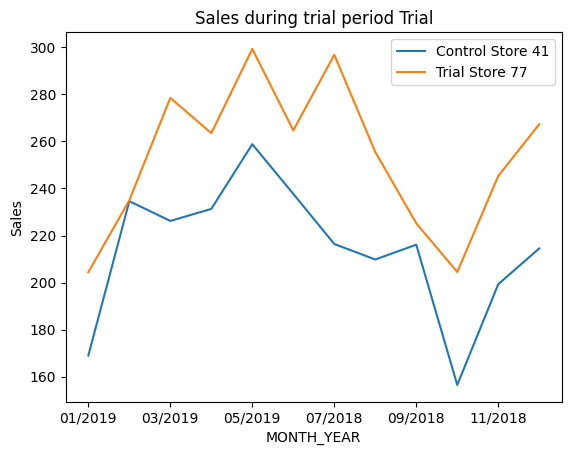

In [44]:
grouped41["TOT_SALES"].sum().plot(label = "Control Store 41")
grouped77["TOT_SALES"].sum().plot(label = "Trial Store 77")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales during trial period Trial")
plt.show()

##### 
FOR THE FIRST PAIR WE CAN SEE A CLEAR DIFFERENCE BETWEEN THE TRIAL STORE AND THE CONTROL STORE. LETS LOOK AT THE NEXT PAIR OF STORES.

##### <a id='toc1_1_1_3_5_'></a>[LETS START WITH STORE 86 & 109](#toc0_)



In [45]:
# LOOKING AT TOTAL SALES & PRODUCTS SOLD 
trial_store_86[["TOT_SALES", "PROD_QTY"]].sum()


TOT_SALES    10635.35
PROD_QTY      3066.00
dtype: float64

In [46]:
# LOOKING AT TOTAL SALES & PRODUCTS SOLD 
control_store_109[["TOT_SALES", "PROD_QTY"]].sum()


TOT_SALES    10399.1
PROD_QTY      2977.0
dtype: float64

In [49]:
# LOOKING AT REPEAT CUSTOMERS FOR TRIAL STORE
trial_store_86["LYLTY_CARD_NBR"].value_counts()


LYLTY_CARD_NBR
86133     13
86112     13
86151     12
86075     12
86008     12
          ..
155000     1
155003     1
155004     1
155005     1
155510     1
Name: count, Length: 273, dtype: int64

In [50]:
# TOTAL CUSTOMER TRANSACTIONS
trial_store_86[["LYLTY_CARD_NBR"]].count()


LYLTY_CARD_NBR    1538
dtype: int64

In [51]:
#  WE HAVE 123 REPEAT CUSTOMERS FOR STORE 86
repeat_customers_86 = trial_store_86["LYLTY_CARD_NBR"].value_counts()
repeat_customers_86.iloc[:125]


LYLTY_CARD_NBR
86133    13
86112    13
86151    12
86075    12
86008    12
         ..
86208     6
86030     6
86031     6
86028     6
86016     6
Name: count, Length: 125, dtype: int64

In [52]:
# LOOKING AT REPEAT CUSTOMERS FOR CONTROL STORE
control_store_109["LYLTY_CARD_NBR"].value_counts()


LYLTY_CARD_NBR
109036    16
109080    14
109086    13
109078    12
109212    12
          ..
109121     1
109017     1
109200     1
109214     1
109222     1
Name: count, Length: 261, dtype: int64

In [53]:
# TOTAL CUSTOMER TRANSACTIONS
control_store_109[["LYLTY_CARD_NBR"]].count()

LYLTY_CARD_NBR    1505
dtype: int64

In [54]:
# WE HAVE 111 REPEAT CUSTOMERS FOR STORE 86
repeat_customers_109 = control_store_109["LYLTY_CARD_NBR"].value_counts()
repeat_customers_109.iloc[:115]


LYLTY_CARD_NBR
109036    16
109080    14
109086    13
109078    12
109212    12
          ..
109075     6
109066     6
109065     6
109148     6
109113     6
Name: count, Length: 115, dtype: int64

In [55]:
# GROUPING STORES BY MONTH
grouped86 = trial_store_86.groupby("MONTH_YEAR")
grouped109 = control_store_109.groupby("MONTH_YEAR")

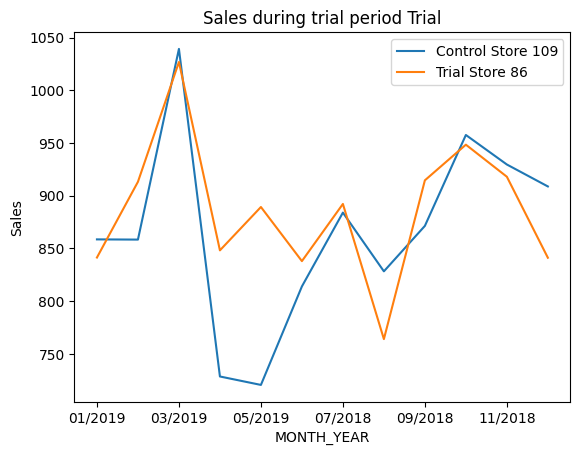

In [ ]:
grouped109["TOT_SALES"].sum().plot(label = "Control Store 109")
grouped86["TOT_SALES"].sum().plot(label = "Trial Store 86")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales during trial period Trial")
plt.show()

###### <a id='toc1_1_1_3_5_1_'></a>[FOR THE SECOND PAIR WE CAN SEE A CLEAR DIFFERENCE BETWEEN THE TRIAL STORE AND THE CONTROL STORE. LETS LOOK AT THE NEXT PAIR OF STORES.](#toc0_)

##### <a id='toc1_1_1_3_6_'></a>[LETS START WITH STORE 88 & 201](#toc0_)



In [57]:
# LOOKING AT TOTAL SALES & PRODUCTS SOLD 
trial_store_88[["TOT_SALES", "PROD_QTY"]].sum()

TOT_SALES    16333.25
PROD_QTY      3718.00
dtype: float64

In [58]:
# LOOKING AT TOTAL SALES & PRODUCTS SOLD 
control_store_201[["TOT_SALES", "PROD_QTY"]].sum()


TOT_SALES    14298.7
PROD_QTY      3262.0
dtype: float64

In [60]:
#  LOOKING AT REPEAT CUSTOMERS FOR TRIAL STORE
trial_store_88["LYLTY_CARD_NBR"].value_counts()

LYLTY_CARD_NBR
88105      13
88247      11
88358      11
88351      10
88348      10
           ..
88355       1
88372       1
2370701     1
2370751     1
2373711     1
Name: count, Length: 388, dtype: int64

In [61]:
# TOTAL CUSTOMER TRANSACTIONS
trial_store_88[["LYLTY_CARD_NBR"]].count()

LYLTY_CARD_NBR    1873
dtype: int64

In [62]:

# WE HAVE 145 REPEAT CUSTOMERS FOR STORE 86
repeat_customers_88 = trial_store_88["LYLTY_CARD_NBR"].value_counts()
repeat_customers_88.iloc[:146]

LYLTY_CARD_NBR
88105    13
88247    11
88358    11
88351    10
88348    10
         ..
88218     6
88134     6
88194     6
88188     6
88181     6
Name: count, Length: 146, dtype: int64

In [63]:
# LOOKING AT REPEAT CUSTOMERS FOR CONTROL STORE
control_store_201["LYLTY_CARD_NBR"].value_counts()

LYLTY_CARD_NBR
201294    13
201120    11
201186    11
201206    10
201018    10
          ..
201057     1
201037     1
201043     1
201356     1
201005     1
Name: count, Length: 376, dtype: int64

In [64]:
# WE HAVE 109 REPEAT CUSTOMERS FOR STORE 86
repeat_customers_109 = control_store_109["LYLTY_CARD_NBR"].value_counts()
repeat_customers_109.iloc[:110]

LYLTY_CARD_NBR
109036    16
109080    14
109086    13
109078    12
109212    12
          ..
109202     6
109095     6
109077     6
109073     6
109074     6
Name: count, Length: 110, dtype: int64

In [65]:

# GROUPING STORES BY MONTH
grouped88 = trial_store_88.groupby("MONTH_YEAR")
grouped201 = control_store_201.groupby("MONTH_YEAR")

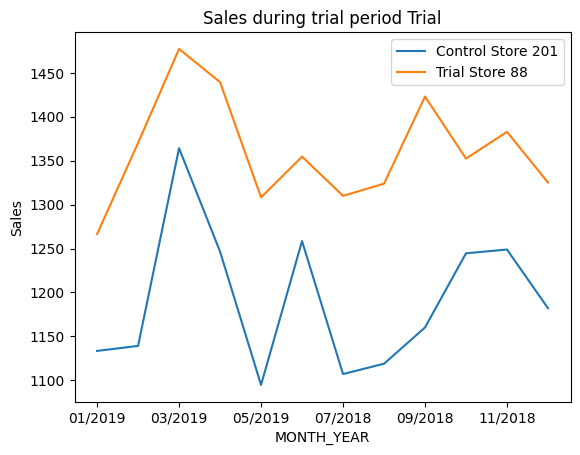

In [ ]:

grouped201["TOT_SALES"].sum().plot(label = "Control Store 201")
grouped88["TOT_SALES"].sum().plot(label = "Trial Store 88")
plt.ylabel("Sales")
plt.legend()
plt.title("Sales during trial period Trial")
plt.show()

###### <a id='toc1_1_1_3_6_1_'></a>[FOR THE THIRD PAIR WE CAN SEE A CLEAR DIFFERENCE BETWEEN THE TRIAL STORE AND THE CONTROL STORE. LETS LOOK AT THE NEXT PAIR OF STORES](#toc0_)

Text(0.5, 1.0, 'Product Quantity during trial period')

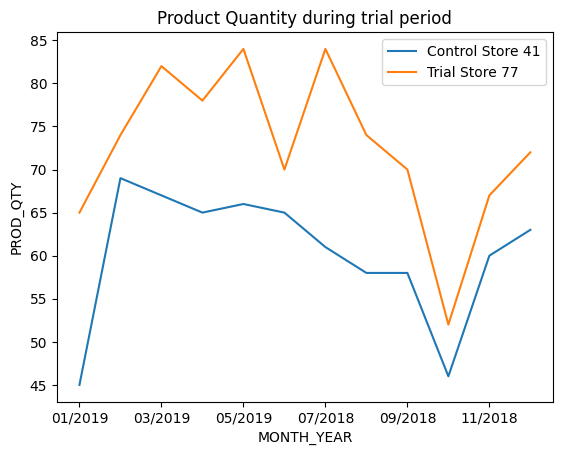

In [67]:
grouped41["PROD_QTY"].sum().plot(label = "Control Store 41")
grouped77["PROD_QTY"].sum().plot(label = "Trial Store 77")
plt.ylabel("PROD_QTY")
plt.legend()
plt.title("Product Quantity during trial period")


Text(0.5, 1.0, 'Product Quantity during trial period')

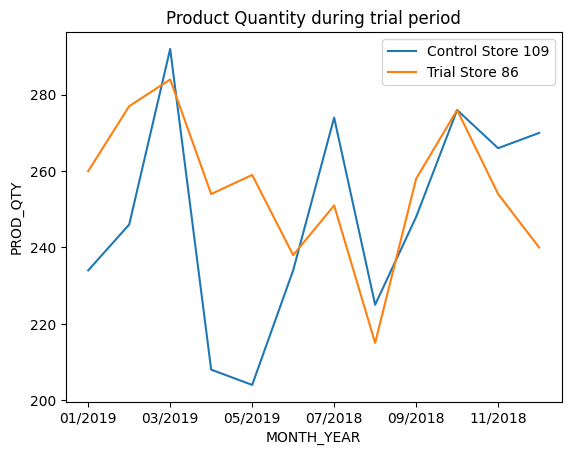

In [68]:
grouped109["PROD_QTY"].sum().plot(label = "Control Store 109")
grouped86["PROD_QTY"].sum().plot(label = "Trial Store 86")
plt.ylabel("PROD_QTY")
plt.legend()
plt.title("Product Quantity during trial period")

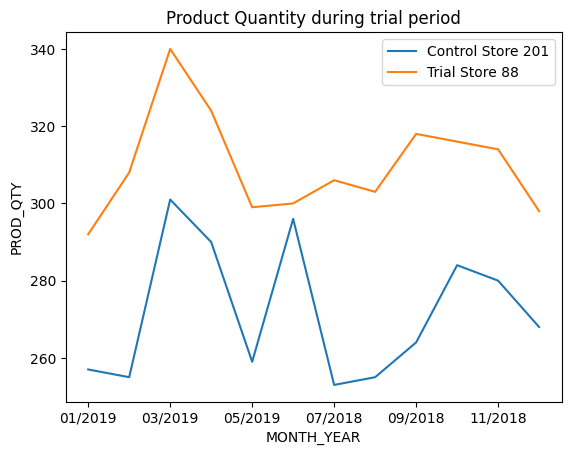

In [ ]:
grouped201["PROD_QTY"].sum().plot(label = "Control Store 201")
grouped88["PROD_QTY"].sum().plot(label = "Trial Store 88")
plt.ylabel("PROD_QTY")
plt.legend()
plt.title("Product Quantity during trial period")
plt.show()

##### <a id='toc1_1_1_3_7_'></a>[AS WE CAN SEE BY THE GRAPHS ABOVE THE TRIAL STORES OUTPERFORMED THE CONTROL STORES BY QUANTITY SOLD.](#toc0_)

##### <a id='toc1_1_1_3_8_'></a>[LETS SEE HOW THEY STACK UP WITH AVERAGE TRANSACTIONS PER CUSTOMER](#toc0_)



In [70]:
grouped77["LYLTY_CARD_NBR"].value_counts().mean()


np.float64(1.048417132216015)

In [71]:
grouped109["LYLTY_CARD_NBR"].value_counts().mean()


np.float64(1.2918454935622317)

In [72]:
grouped88["LYLTY_CARD_NBR"].value_counts().mean()


np.float64(1.2363036303630364)

In [73]:
grouped201["LYLTY_CARD_NBR"].value_counts().mean()


np.float64(1.1689045936395759)

Text(0.5, 1.0, 'Average products per customer Trial Period')

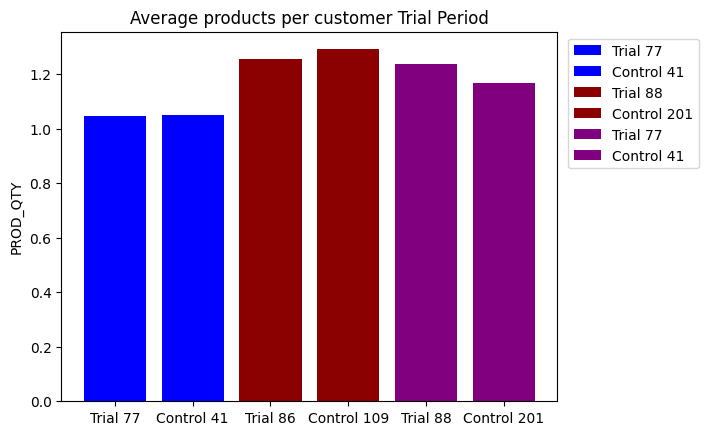

In [ ]:
group1 = ["Trial 77", "Control 41"]
group2 = ["Trial 86", "Control 109"]
group3 = ["Trial 88", "Control 201"]
values_grp_1 = [1.048417132216015, 1.05]
values_grp_2 = [1.2544861337683524, 1.2918454935622317]
values_grp_3 = [1.2363036303630364, 1.1689045936395759]

plt.bar(group1, values_grp_1, label = group1, color = "blue")
plt.bar(group2, values_grp_2, label = group3, color = "darkred")
plt.bar(group3, values_grp_3, label = group1, color = "purple")

plt.ylabel("PROD_QTY")
plt.legend(loc = "upper right", bbox_to_anchor = (1.3, 1))
plt.title("Average products per customer Trial Period")

###### <a id='toc1_1_1_3_8_1_'></a>[AS WE CAN SEE THE AVERAGE TRANSACTIONS WERE SLIGHTLY HIGHER FOR 1 OF THE 3 TRIAL STORES.](#toc0_)

I BELIEVE THE NEW LAYOUT IS WORKING TO INCREASE SALES. SALES, PRODUCTS SOLD, AMOUNT OF REPEAT CUSTOMERS AND AVERAGE TRANSACTIONS PER CUSTOMER ALL SHOW SIGNS THATS THE TRIAL STORES ARE OUTPERFORMING THE CONTROL STORES.

MY RECOMMENDATION WOULD BE TO INCREASE THE AMOUNT OF TRIAL STORES AND TO RUN ANOTHER ANALYSIS IN 3 MONTHS TO SEE IF THE INCREASED SALES STAY TRUE AND STABILIZE AT A HIGHER POINT